Original Source: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [24.1 The Basics of Waves](chapter24.01-The-Basics-of-waves.ipynb) | [Contents](Index.ipynb) | [24.3 Fast Fourier Transform (FFT)](chapter24.03-Fast-Fourier-Transform.ipynb) >

# Discrete Fourier Transform (DFT)

From the previous section, we learned how we can easily characterize a wave with period/frequency, amplitude, phase. But these are easy for simple periodic signal, such as sine or cosine waves. For complicated waves, it is not easy to characterize like that. For example, the following is a relatively more complicate waves, and it is hard to say what's the frequency, amplitude of the wave, right?

<img src="images/24.02.01-waves_with_3sine.jpg" alt="Complicate waves" title="A more complicate wave." width="500"/>

There are more complicated cases in real world, it would be great if we have a method that we can use to analyze the characteristics of the wave. The **Fourier Transform** can be used for this purpose, which it decompose any signal into a sum of simple sine and cosine waves that we can easily measure the frequency, amplitude and phase. The Fourier transform can be applied to continuous or discrete waves, in this chapter, we will only talk about the Discrete Fourier Transform (DFT). 

Using the DFT, we can compose the above signal to a series of sinusoids and each of them will have a different frequency. The following 3D figure shows the idea behind the DFT, that the above signal is actually the results of the sum of 3 different sine waves. The time domain signal, which is the above signal we saw can be transformed into a figure in the frequency domain called DFT amplitude spectrum, where the signal frequencies are showing as vertical bars. The height of the bar after normalization is the amplitude of the signal in the time domain. You can see that the 3 vertical bars are corresponding the 3 frequencies of the sine wave, which are also plotted in the figure. 

<img src="images/24.02.02-time_frequency.png" alt="DFT" title="Illustration of Fourier transform with time and frequency domain signal." width="500"/>

In this section, we will learn how to use DFT to compute and plot the DFT amplitude spectrum.  

## DFT 
The DFT can transform a sequence of evenly spaced signal to the information about the frequency of all the  sine waves that needed to sum to the time domain signal. It is defined as:

$$ X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}{x_n[cos(2\pi{kn/N}) -i\cdot sin(2\pi{kn/N})]}$$

where 

* N = number of samples
* n = current sample
* k = current frequency, where $ k\in [0,N-1]$
* $x_n$ = the sine value at sample n
* $X_k$ = The DFT which include information of both amplitude and phase

Also, the last expression in the above equation derived from the *Euler's formula*, which links the trigonometric functions to the complex exponential function: $e^{i\cdot x} = cosx+i\cdot sinx$

Due to the nature of the transform, $X_0 = \sum_{n=0}^{N-1}x_n$. If $N$ is an odd number, the elements $X_1, X_2, ..., X_{(N-1)/2}$ contain the positive frequency terms and the elements $X_{(N+1)/2}, ..., X_{N-1}$ contain the negative frequency terms, in order of decreasingly negative frequency. While if $N$ is even, the elements $X_1, X_2, ..., X_{N/2-1}$ contain the positive frequency terms, and the elements $X_{N/2},...,X_{N-1}$ contain the negative frequency terms, in order of decreasingly negative frequency. In the case that our input signal $x$ is a real-valued sequence, the DFT output $X_n$ for positive frequencies is the conjugate of the values $X_n$ for negative frequencies, the spectrum will be symmetric. Therefore, usually we only plot the DFT corresponding to the positive frequencies. 

Note that the $X_k$ is a complex number that encodes both the amplitude and phase information of a complex sinusoidal component $e^{i\cdot 2\pi kn/N}$ of function $x_n$. The amplitude and phase of the signal can be calculated as:

$$amp = \frac{|X_k|}{N}= \frac{\sqrt{Re(X_k)^2 + Im(X_k)^2}}{N}$$
$$phase = atan2(Im(X_k), Re(X_k))$$

where $Im(X_k)$ and $Re(X_k)$ are the imagery and real part of the complex number, $atan2$ is the two-argument form of the $arctan$ function. 

The amplitudes returned by DFT equal to the amplitudes of the signals fed into the DFT if we normalize it by the number of sample points. Note that doing this will divide the power between the positive and negative sides, if the input signal is real-valued sequence as we described above, the spectrum of the positive and negative frequencies will be symmetric, therefore, we will only look at one side of the DFT result, and instead of divide $N$, we divide $N/2$ to get the amplitude corresponding to the time domain signal.

Now that we have the basic knowledge of DFT, let's see how we can use it. 

**TRY IT!** Generate 3 sine waves with frequencies 1 Hz, 4 Hz, and 7 Hz, amplitudes 3, 1 and 0.5, and phase all zeros. Add this 3 sine waves together with a sampling rate 100 Hz, you will see that it is the same signal we just shown at the beginning of the section. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')

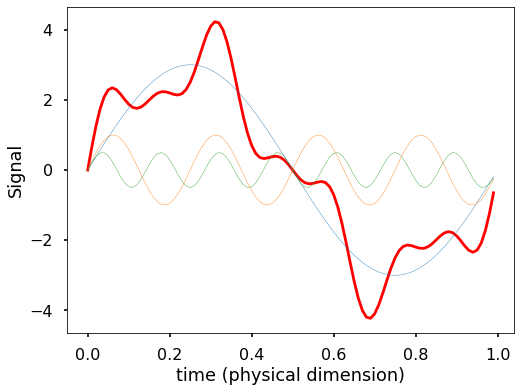

In [67]:
# sampling rate
sr = 100   # Hz
# sampling interval
ts = 1.0/sr  # per second
t = np.arange(0, 1, ts)  # this denotes the physical dimension

freq = 1.
x1 = 3*np.sin(2*np.pi*freq*t)

freq = 4.
x2 = np.sin(2*np.pi*freq*t)

freq = 7.  
x3 = 0.5* np.sin(2*np.pi*freq*t)

x = x1 + x2 + x3

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.plot(t, x1, linewidth=.4)
plt.plot(t, x2, linewidth=.4)
plt.plot(t, x3, linewidth=.4)
plt.ylabel('Signal'); plt.xlabel('time (physical dimension)')

plt.show()

Text(0.5, 1.0, 'plot of samples N=100')

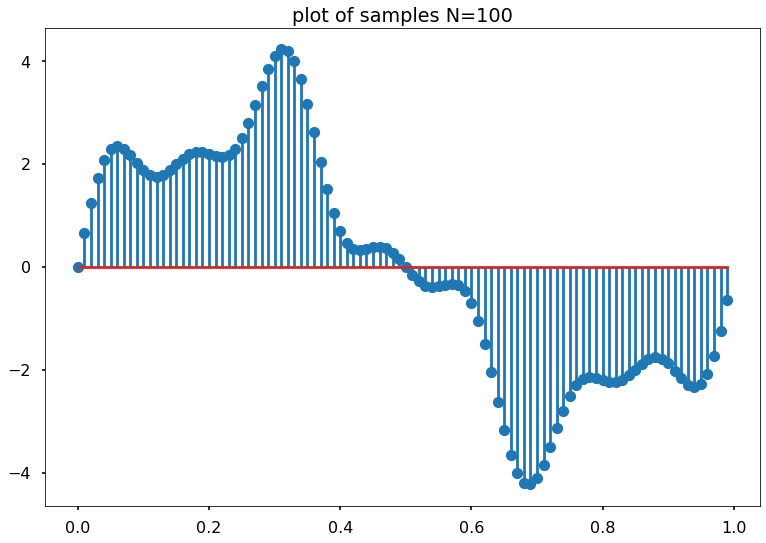

In [68]:
plt.stem(t, x);
plt.title(f'plot of samples N={len(x)}')

Text(0.5, 1.0, 'plot of samples N=100 w/o physical dimension')

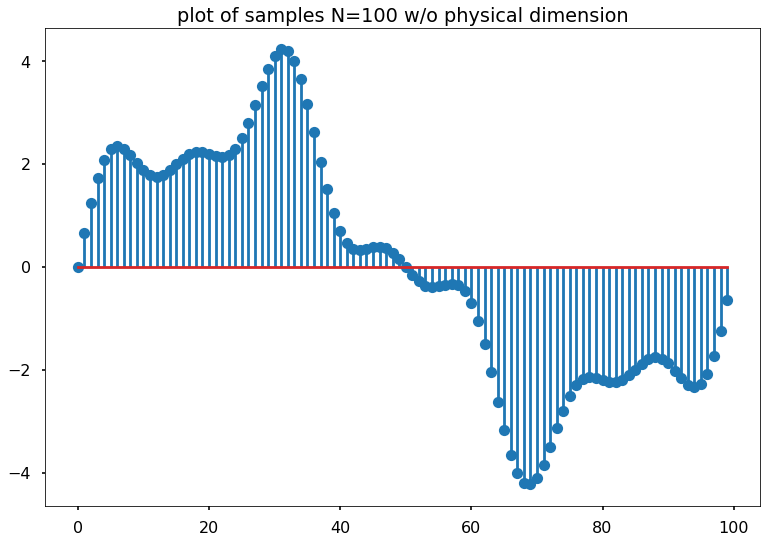

In [69]:
plt.stem(x);
plt.title(f'plot of samples N={len(x)} w/o physical dimension')

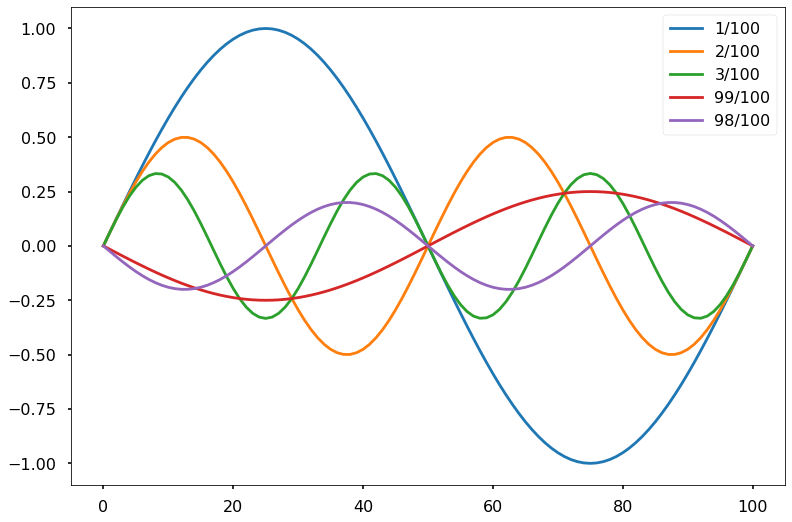

In [70]:
# discrete time sin function

N = 100 
n = np.arange(N+1)
for i, k in enumerate([1, 2, 3, N-1, N-2]):
    s = np.sin(2*np.pi*(float(k)/N)*n) * (1./(i+1))
    plt.plot(s, label=f'{k}/{N}')

plt.legend();

Some trigonometry useful to better understand the graph.
1. $$\sin(0) = \sin(2\pi) = 0$$
1. $$\sin(-x) = -\sin(x)$$
1. For a frequency constant $k > 0$ (which is not exactly a frequency but ...), $$\sin(2\pi \frac{N-k}{N}n) = \sin(2\pi (1 - k/N)n) = \sin(2\pi n - 2\pi (k/N)n ) \\ = -\sin(2\pi (k/N)n)$$


**TRY IT!** Write a function *DFT(x)* which takes in one argument, _x_ - input 1 dimensional real-valued signal. The function will calculate the DFT of the signal and return the DFT values. Apply this function to the signal we generated above and plot the result. 

In [71]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    # print(e)
    X = np.dot(e, x)
    
    return X

In [72]:
N = len(x); print('N=', N)
n = np.arange(N); print(n)
k = n.reshape((N, 1));  print(k[:4])
print(k*n)
e = np.exp(-2j * np.pi * k * n / N)
# print(e)
X = np.dot(e, x)
print(X.shape, type(X), X.dtype)

N= 100
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[[0]
 [1]
 [2]
 [3]]
[[   0    0    0 ...    0    0    0]
 [   0    1    2 ...   97   98   99]
 [   0    2    4 ...  194  196  198]
 ...
 [   0   97  194 ... 9409 9506 9603]
 [   0   98  196 ... 9506 9604 9702]
 [   0   99  198 ... 9603 9702 9801]]
(100,) <class 'numpy.ndarray'> complex128


In [73]:
np.abs(np.complex(1, 1))

1.4142135623730951

fundamental frequency:  1.0
freq:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
X: [  0. 150.   0.   0.  50.   0.   0.  25.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]


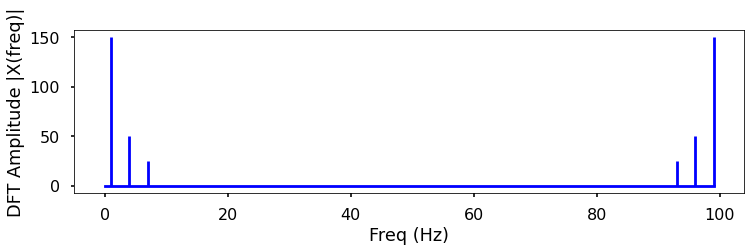

In [75]:
X = DFT(x)

# calculate the frequency
N = len(X)   # num. of samples
k = np.arange(N)  #
T = N/sr          # Total time duration of the signal. Here, we have N samples, sampled for T seconds with sr=100.
ffreq = 1. / T    # fundamental frequecy: https://asp-eurasipjournals.springeropen.com/articles/10.1186/1687-6180-2012-56
freq = k * ffreq        #   

print('fundamental frequency: ', ffreq)
print('freq: ', freq[:20])
print('X:', np.round(np.abs(X[:20]), 5))

plt.figure(figsize = (12, 3))
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

- The frequency response is obtained only at the integer multiple of the fundamental frequency.

We can see from here that the output of the DFT is symmetric at half of the sampling rate (you can try different sampling rate to test). This half of the sampling rate is called **Nyquist frequency** or the folding frequency, it is named after the electronic engineer Harry Nyquist. He and Claude Shannon have the Nyquist-Shannon sampling theorem, which states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency, thus the highest frequency output from the DFT is half the sampling rate. 

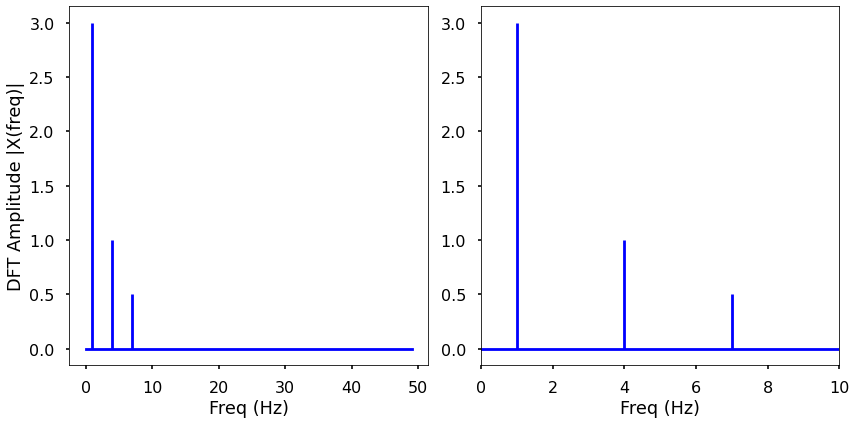

In [5]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

We can see by plotting the first half of the DFT results, we can see 3 clear peaks at frequency 1 Hz, 4 Hz, and 7 Hz, with amplitude 3, 1, 0.5 as expected. This is how we can use the DFT to analyze an arbitrary signal by decomposing it to simple sine waves.   

## The inverse DFT

Of course, we can do the inverse transform of the DFT easily. 

$$ x_n = \frac{1}{N}\sum_{k=0}^{N-1}{X_k\cdot e^{i\cdot 2\pi{kn/N}}}$$

We will leave this as an exercise for you to write a function. 

## The limit of DFT

The main issue with the above DFT implementation is that it is not efficient if we have a signal with many data points. It may take a long time to compute the DFT if the signal is large.

**TRY IT** Write a function to generate a simple signal with different sampling rate, and see the difference of computing time by varying the sampling rate. 

In [6]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [7]:
# sampling rate =2000
sr = 2000
%timeit DFT(gen_sig(sr))

251 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# sampling rate 20000
sr = 20000
%timeit DFT(gen_sig(sr))

We can see that, with the number of data points increasing, we can use a lot of computation time with this DFT. Luckily, the Fast Fourier Transform (FFT) was popularized by Cooley and Tukey in their [1965 paper](http://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/) that solve this problem efficiently, which will be the topic for the next section. 

<!--NAVIGATION-->
< [24.1 The Basics of Waves](chapter24.01-The-Basics-of-waves.ipynb) | [Contents](Index.ipynb) | [24.3 Fast Fourier Transform (FFT)](chapter24.03-Fast-Fourier-Transform.ipynb) >